<div class="alert alert-success">
<b>Reviewer's comment V4</b>

The project is accepted! Good luck on the next sprint! 

</div>

**Review**

Hi, my name is Dmitry and I will be reviewing your project.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  For your comments and questions.
</div>
  
First of all, thank you for turning in the project! You did a great job overall, but there are some problems that need to be fixed before the project is accepted. Let me know if you have any questions!

# Machine Learning Model for Zyfra
I have been tasked to prepare a prototype of a machine learning model for Zyfra, a company which develops efficiency solutions for heavy industry.

The model should predict the amount of gold recovered from gold ore. I have the data on extraction and purification.

The model will help to optimize the production and eliminate unprofitable parameters.
Steps for my process:
- Prepare the data;
- Perform data analysis;
- Develop and train a model.

## Initializing

I will import what I need to complete this task and then import the data taking my first looks at the condition of the files

In [1]:
import numpy as np
import pandas as pd
import timeit
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
pd.options.mode.chained_assignment = None 
from sklearn.dummy import DummyRegressor 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import *
import warnings
warnings.filterwarnings('ignore')

print('Project libraries has been successfully been imported')

Project libraries has been successfully been imported


In [2]:
try:
    gold_recovery_train = pd.read_csv('/datasets/gold_recovery_train.csv')
    gold_recovery_test = pd.read_csv('/datasets/gold_recovery_test.csv')
    gold_recovery_full = pd.read_csv('/datasets/gold_recovery_full.csv')
except:
    gold_recovery_train = pd.read_csv('C:/Users/hotty/Desktop/Practicum by Yandex/Projects/Integrated Project 2/gold_recovery_train.csv')
    gold_recovery_test = pd.read_csv('C:/Users/hotty/Desktop/Practicum by Yandex/Projects/Integrated Project 2/gold_recovery_test.csv')
    gold_recovery_full = pd.read_csv('C:/Users/hotty/Desktop/Practicum by Yandex/Projects/Integrated Project 2/gold_recovery_full.csv')
print('Data has been read correctly')

Data has been read correctly


In [3]:
def get_percent_of_na(df, num):
    count = 0
    df = df.copy()
    s = (df.isna().sum() / df.shape[0])
    for column, percent in zip(s.index, s.values):
        num_of_nulls = df[column].isna().sum()
        if num_of_nulls == 0:
            continue
        else:
            count += 1
        print('Column {} has {:.{}%} percent of Nulls, and {} of nulls'.format(column, percent, num, num_of_nulls))
    if count != 0:
        print("\033[1m" + 'There are {} columns with NA.'.format(count) + "\033[0m")
    else:
        print()
        print("\033[1m" + 'There are no columns with NA.' + "\033[0m")
        
def get_info(df):
    """
    This function uses the head(), info(), describe(), shape() and duplicated() 
    methods to display the general information about the dataset.
    """
    print("\033[1m" + '-'*100 + "\033[0m")
    print('Head:')
    print()
    display(df.head())
    print('-'*100)
    print('Info:')
    print()
    display(df.info())
    print('-'*100)
    print('Describe:')
    print()
    display(df.describe())
    print('-'*100)
    display(df.describe(include='object'))
    print()
    print('Columns with nulls:')
    display(get_percent_of_na(df, 4))  
    print('-'*100)
    print('Shape:')
    print(df.shape)
    print('-'*100)
    print('Duplicated:')
    print("\033[1m" + 'We have {} duplicated rows.\n'.format(df.duplicated().sum()) + "\033[0m")
    print()

In [4]:
print('General information about the dataframe')
get_info(gold_recovery_train)
get_info(gold_recovery_test)
get_info(gold_recovery_full)

General information about the dataframe
----------------------------------------------------------------------------------------------------
Head:



,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                             

None

----------------------------------------------------------------------------------------------------
Describe:



,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,...,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775.000000,16776.000000,16757.000000,16775.000000
mean,4.716907,9.113559,8.301123,39.467217,67.213166,8.757048,2.360327,9.303932,2.687512,129.479789,...,19.101874,-494.164481,14.778164,-476.600082,15.779488,-500.230146,12.377241,-498.956257,18.429208,-521.801826
std,2.096718,3.389495,3.825760,13.917227,11.960446,3.634103,1.215576,4.263208,1.272757,45.386931,...,6.883163,84.803334,5.999149,89.381172,6.834703,76.983542,6.219989,82.146207,6.958294,77.170888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.021781,-0.423260,-799.741097,0.427084,-800.258209,0.024270,-810.473526
25%,3.971262,8.825748,6.939185,42.055722,62.625685,7.610544,1.641604,7.870275,2.172953,103.064021,...,14.508299,-500.837689,10.741388,-500.269182,10.977713,-500.530594,8.925586,-500.147603,13.977626,-501.080595
50%,4.869346,10.065316,8.557228,44.498874,67.644601,9.220393,2.453690,10.021968,2.781132,131.783108,...,19.986958,-499.778379,14.943933,-499.593286,15.998340,-499.784231,11.092839,-499.933330,18.034960,-500.109898
75%,5.821176,11.054809,10.289741,45.976222,72.824595,10.971110,3.192404,11.648573,3.416936,159.539839,...,24.983961,-494.648754,20.023751,-400.137948,20.000701,-496.531781,15.979467,-498.418000,24.984992,-499.565540
max,16.001945,17.031899,18.124851,53.611374,100.000000,19.552149,6.086532,22.317730,9.789625,251.999948,...,60.000000,-127.692333,28.003828,-71.472472,63.116298,-275.073125,39.846228,-120.190931,54.876806,-39.784927


----------------------------------------------------------------------------------------------------


,date
count,16860
unique,16860
top,2017-05-11 18:59:59
freq,1



Columns with nulls:
Column final.output.concentrate_ag has 0.4270% percent of Nulls, and 72 of nulls
Column final.output.concentrate_pb has 0.4270% percent of Nulls, and 72 of nulls
Column final.output.concentrate_sol has 2.1945% percent of Nulls, and 370 of nulls
Column final.output.concentrate_au has 0.4211% percent of Nulls, and 71 of nulls
Column final.output.recovery has 9.0214% percent of Nulls, and 1521 of nulls
Column final.output.tail_ag has 0.3915% percent of Nulls, and 66 of nulls
Column final.output.tail_pb has 1.0854% percent of Nulls, and 183 of nulls
Column final.output.tail_sol has 0.8600% percent of Nulls, and 145 of nulls
Column final.output.tail_au has 0.3915% percent of Nulls, and 66 of nulls
Column primary_cleaner.input.sulfate has 7.7521% percent of Nulls, and 1307 of nulls
Column primary_cleaner.input.depressant has 7.4852% percent of Nulls, and 1262 of nulls
Column primary_cleaner.input.xanthate has 5.8422% percent of Nulls, and 985 of nulls
Column primary_clea

None

----------------------------------------------------------------------------------------------------
Shape:
(16860, 87)
----------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows.


----------------------------------------------------------------------------------------------------
Head:



,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 n

None

----------------------------------------------------------------------------------------------------
Describe:



,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5554.000000,5572.000000,5856.000000,5690.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,...,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,170.515243,8.482873,7.264651,1.321420,1481.990241,-509.057796,1486.908670,-511.743956,1468.495216,-509.741212,...,15.636031,-516.266074,13.145702,-476.338907,12.308967,-512.208126,9.470986,-505.017827,16.678722,-512.351694
std,49.608602,3.353105,0.611526,0.693246,310.453166,61.339256,313.224286,67.139074,309.980748,62.671873,...,4.660835,62.756748,4.304086,105.549424,3.762827,58.864651,3.312471,68.785898,5.404514,69.919839
min,0.000103,0.000031,5.650000,0.000003,0.000000,-799.773788,0.000000,-800.029078,0.000000,-799.995127,...,0.000000,-799.798523,0.000000,-800.836914,-0.223393,-799.661076,0.528083,-800.220337,-0.079426,-809.859706
25%,143.340022,6.411500,6.885625,0.888769,1497.190681,-500.455211,1497.150234,-500.936639,1437.050321,-501.300441,...,12.057838,-501.054741,11.880119,-500.419113,10.123459,-500.879383,7.991208,-500.223089,13.012422,-500.833821
50%,176.103893,8.023252,7.259333,1.183362,1554.659783,-499.997402,1553.268084,-500.066588,1546.160672,-500.079537,...,17.001867,-500.160145,14.952102,-499.644328,12.062877,-500.047621,9.980774,-500.001338,16.007242,-500.041085
75%,207.240761,10.017725,7.650000,1.763797,1601.681656,-499.575313,1601.784707,-499.323361,1600.785573,-499.009545,...,18.030985,-499.441529,15.940011,-401.523664,15.017881,-499.297033,11.992176,-499.722835,21.009076,-499.395621
max,274.409626,40.024582,15.500000,5.433169,2212.432090,-57.195404,1975.147923,-142.527229,1715.053773,-150.937035,...,30.051797,-401.565212,31.269706,-6.506986,25.258848,-244.483566,14.090194,-126.463446,26.705889,-29.093593


----------------------------------------------------------------------------------------------------


,date
count,5856
unique,5856
top,2016-12-11 04:59:59
freq,1



Columns with nulls:
Column primary_cleaner.input.sulfate has 5.1571% percent of Nulls, and 302 of nulls
Column primary_cleaner.input.depressant has 4.8497% percent of Nulls, and 284 of nulls
Column primary_cleaner.input.xanthate has 2.8347% percent of Nulls, and 166 of nulls
Column primary_cleaner.state.floatbank8_a_air has 0.2732% percent of Nulls, and 16 of nulls
Column primary_cleaner.state.floatbank8_a_level has 0.2732% percent of Nulls, and 16 of nulls
Column primary_cleaner.state.floatbank8_b_air has 0.2732% percent of Nulls, and 16 of nulls
Column primary_cleaner.state.floatbank8_b_level has 0.2732% percent of Nulls, and 16 of nulls
Column primary_cleaner.state.floatbank8_c_air has 0.2732% percent of Nulls, and 16 of nulls
Column primary_cleaner.state.floatbank8_c_level has 0.2732% percent of Nulls, and 16 of nulls
Column primary_cleaner.state.floatbank8_d_air has 0.2732% percent of Nulls, and 16 of nulls
Column primary_cleaner.state.floatbank8_d_level has 0.2732% percent of Nu

None

----------------------------------------------------------------------------------------------------
Shape:
(5856, 53)
----------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows.


----------------------------------------------------------------------------------------------------
Head:



,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                             

None

----------------------------------------------------------------------------------------------------
Describe:



,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,21107.000000,...,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615.000000,22616.000000,22597.000000,22615.000000
mean,4.781559,9.095308,8.640317,40.001172,67.447488,8.923690,2.488252,9.523632,2.827459,140.277672,...,18.205125,-499.878977,14.356474,-476.532613,14.883276,-503.323288,11.626743,-500.521502,17.976810,-519.361465
std,2.030128,3.230797,3.785035,13.398062,11.616034,3.517917,1.189407,4.079739,1.262834,49.919004,...,6.560700,80.273964,5.655791,93.822791,6.372811,72.925589,5.757449,78.956292,6.636203,75.477151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.836914,-0.423260,-799.741097,0.427084,-800.258209,-0.079426,-810.473526
25%,4.018525,8.750171,7.116799,42.383721,63.282393,7.684016,1.805376,8.143576,2.303108,110.177081,...,14.095940,-500.896232,10.882675,-500.309169,10.941299,-500.628697,8.037533,-500.167897,13.968418,-500.981671
50%,4.953729,9.914519,8.908792,44.653436,68.322258,9.484369,2.653001,10.212998,2.913794,141.330501,...,18.007326,-499.917108,14.947646,-499.612292,14.859117,-499.865158,10.989756,-499.951980,18.004215,-500.095463
75%,5.862593,10.929839,10.705824,46.111999,72.950836,11.084557,3.287790,11.860824,3.555077,174.049914,...,22.998194,-498.361545,17.977502,-400.224147,18.014914,-498.489381,14.001193,-499.492354,23.009704,-499.526388
max,16.001945,17.031899,19.615720,53.611374,100.000000,19.552149,6.086532,22.861749,9.789625,274.409626,...,60.000000,-127.692333,31.269706,-6.506986,63.116298,-244.483566,39.846228,-120.190931,54.876806,-29.093593


----------------------------------------------------------------------------------------------------


,date
count,22716
unique,22716
top,2017-05-11 18:59:59
freq,1



Columns with nulls:
Column final.output.concentrate_ag has 0.3918% percent of Nulls, and 89 of nulls
Column final.output.concentrate_pb has 0.3830% percent of Nulls, and 87 of nulls
Column final.output.concentrate_sol has 1.6948% percent of Nulls, and 385 of nulls
Column final.output.concentrate_au has 0.3786% percent of Nulls, and 86 of nulls
Column final.output.recovery has 8.6415% percent of Nulls, and 1963 of nulls
Column final.output.tail_ag has 0.3654% percent of Nulls, and 83 of nulls
Column final.output.tail_pb has 0.8804% percent of Nulls, and 200 of nulls
Column final.output.tail_sol has 1.1930% percent of Nulls, and 271 of nulls
Column final.output.tail_au has 0.3566% percent of Nulls, and 81 of nulls
Column primary_cleaner.input.sulfate has 7.0831% percent of Nulls, and 1609 of nulls
Column primary_cleaner.input.depressant has 6.8058% percent of Nulls, and 1546 of nulls
Column primary_cleaner.input.xanthate has 5.0669% percent of Nulls, and 1151 of nulls
Column primary_cle

None

----------------------------------------------------------------------------------------------------
Shape:
(22716, 87)
----------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows.




#### Summary 

In the gold_recovery_train.csv dataset, we have 16,860 rows, 86 features, and 85 columns with NA's.
In the gold_recovery_test.csv dataset, we have 5,856 rows, 52 features, and 51 columns with NA's.
In the gold_recovery_full.csv dataset, we have 22,716 rows, 86 features, and 85 columns with NA's.

<div class="alert alert-success">
<b>Reviewer's comment</b>

The data was loaded and inspected

</div>

### Calculate recovery and determine MAE between calculated recovery and feature values recovery

In [5]:
C = gold_recovery_train['rougher.output.concentrate_au']
F = gold_recovery_train['rougher.input.feed_au']
T = gold_recovery_train['rougher.output.tail_au']

calculated_recovery = (C * (F - T)) / (F * (C - T)) * 100
calculated_recovery

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Length: 16860, dtype: float64

#### MAE calculation

In [6]:
mae_calc = pd.DataFrame({'calculated_recovery': calculated_recovery, 'output_recovery': gold_recovery_train['rougher.output.recovery']}).dropna()
mae = mean_absolute_error(mae_calc.calculated_recovery, mae_calc.output_recovery)
print('The MAE score is: {:.2f}'.format(mae))

The MAE score is: 0.00


now Ill check sample of calculated recovery and output recovery

In [7]:
mae_calc.sample(5)

,calculated_recovery,output_recovery
5713,86.118713,86.118713
14387,87.462479,87.462479
15561,92.630778,92.630778
1019,92.492118,92.492118
5202,86.879073,86.879073


#### Summary 
The calculated_recovery and rougher.output.recovery have similar values. The MAE score is 0.0. This indicates the calculated value from the simulated recovery process is similar to the rougher.output.recovery.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Recovery data was validated successfully!

</div>

### Analyze the features not available in the test set. 

I will first create a dataframe of the features not available in the test sets and inspect its information 

In [8]:
features_diff = list(set(gold_recovery_train.columns).difference(gold_recovery_test.columns))
features_diff

['rougher.calculation.floatbank10_sulfate_to_au_feed',
 'secondary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_ag',
 'secondary_cleaner.output.tail_au',
 'final.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'rougher.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.output.tail_sol',
 'rougher.output.recovery',
 'rougher.output.concentrate_pb',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.concentrate_pb',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'secondary_cleaner.output.tail_pb',
 'rougher.calculation.au_pb_ratio',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'final.output.concentrate_sol',
 'secondary_cleaner.output.tail_ag',
 'final.output.concentrate_ag',
 'rougher.output.tail_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'rougher.output.concentrate_sol',
 '

#### Summary

There are 34 features in the train set that are not available in the test set. The missing features contain the concentration of metals (Au, Ag, Pb). The parameters type are output - product parameters and calculation characteristics.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Yep, you are right!

</div>

## Data Preprocessing
Ill make a function to calculate the percentage of missing values and the total number, presented as a table. Because these are time series data points, the forward fill method should work nicely to resolve our missing data points 

In [9]:
def missing_values_table(df):
    mis_val = df.isnull().sum()

    mis_val_percent = 100 * df.isnull().sum() / len(df)

    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})

    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")

    return mis_val_table_ren_columns

In [10]:
gold_recovery_test.shape

(5856, 53)

In [11]:
gold_recovery_test=gold_recovery_test.merge(gold_recovery_full[['final.output.recovery', 'rougher.output.recovery']], how='left', left_index=True, right_index=True)

In [12]:
gold_recovery_test.shape

(5856, 55)

In [13]:
def convert_date_time(df, col):
    df[col] = pd.to_datetime(df[col])
    df.sort_values(col, inplace=True)
        

In [14]:
missing_values_table(gold_recovery_train)

Your selected dataframe has 87 columns.
There are 85 columns that have missing values.


,Missing Values,% of Total Values
rougher.output.recovery,2573,15.3
rougher.output.tail_ag,2250,13.3
rougher.output.tail_au,2249,13.3
rougher.output.tail_sol,2249,13.3
secondary_cleaner.output.tail_sol,1986,11.8
...,...,...
primary_cleaner.state.floatbank8_b_level,27,0.2
primary_cleaner.state.floatbank8_c_level,27,0.2
primary_cleaner.state.floatbank8_d_level,27,0.2
rougher.calculation.sulfate_to_au_concentrate,27,0.2


In [15]:
missing_values_table(gold_recovery_test)

Your selected dataframe has 55 columns.
There are 53 columns that have missing values.


,Missing Values,% of Total Values
rougher.output.recovery,830,14.2
final.output.recovery,614,10.5
rougher.input.floatbank11_xanthate,353,6.0
primary_cleaner.input.sulfate,302,5.2
primary_cleaner.input.depressant,284,4.8
rougher.input.floatbank10_sulfate,257,4.4
primary_cleaner.input.xanthate,166,2.8
rougher.input.floatbank10_xanthate,123,2.1
rougher.input.feed_sol,67,1.1
rougher.input.floatbank11_sulfate,55,0.9


In [16]:
missing_values_table(gold_recovery_full)

Your selected dataframe has 87 columns.
There are 85 columns that have missing values.


,Missing Values,% of Total Values
rougher.output.recovery,3119,13.7
rougher.output.tail_ag,2737,12.0
rougher.output.tail_au,2736,12.0
rougher.output.tail_sol,2736,12.0
rougher.input.floatbank11_xanthate,2257,9.9
...,...,...
rougher.calculation.floatbank10_sulfate_to_au_feed,44,0.2
rougher.calculation.floatbank11_sulfate_to_au_feed,44,0.2
primary_cleaner.state.floatbank8_d_level,43,0.2
primary_cleaner.state.floatbank8_c_level,43,0.2


### Resolving the missing values

Since missing values in the target cannot be inferred, we will drop the null values from each dataset.

In [17]:
gold_recovery_train=gold_recovery_train.dropna()
golf_recovery_test= gold_recovery_test.dropna()
gold_recovery_full=gold_recovery_full.dropna()

Now I will check each dataset for any values that are still missing 

In [18]:
missing_values_table(gold_recovery_train)

Your selected dataframe has 87 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [19]:
missing_values_table(gold_recovery_test)

Your selected dataframe has 55 columns.
There are 53 columns that have missing values.


,Missing Values,% of Total Values
rougher.output.recovery,830,14.2
final.output.recovery,614,10.5
rougher.input.floatbank11_xanthate,353,6.0
primary_cleaner.input.sulfate,302,5.2
primary_cleaner.input.depressant,284,4.8
rougher.input.floatbank10_sulfate,257,4.4
primary_cleaner.input.xanthate,166,2.8
rougher.input.floatbank10_xanthate,123,2.1
rougher.input.feed_sol,67,1.1
rougher.input.floatbank11_sulfate,55,0.9


In [20]:
missing_values_table(gold_recovery_full)

Your selected dataframe has 87 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

While using forward fill for missing features is valid in this case, it is not appropriate to fill missing targets: we'd like to be reasonably sure that targets are correct to be able to evaluate the model and trust the metrics

</div>

<div class="alert alert-warning">
<b>Reviewer's comment V2</b>

I didn't mean that you need to drop all missing values (using forward fill is fine for the features in this case), but ok

</div>

### Fixing data types
Using the time_time function I will convert the 'date' column to date_time 

In [21]:
convert_date_time(gold_recovery_train, 'date')
convert_date_time(gold_recovery_test, 'date')
convert_date_time(gold_recovery_full, 'date')

In [22]:
gold_recovery_train.dtypes

date                                          datetime64[ns]
final.output.concentrate_ag                          float64
final.output.concentrate_pb                          float64
final.output.concentrate_sol                         float64
final.output.concentrate_au                          float64
                                                   ...      
secondary_cleaner.state.floatbank5_a_level           float64
secondary_cleaner.state.floatbank5_b_air             float64
secondary_cleaner.state.floatbank5_b_level           float64
secondary_cleaner.state.floatbank6_a_air             float64
secondary_cleaner.state.floatbank6_a_level           float64
Length: 87, dtype: object

### Conclusion 
The original dataset had a significant number of missing values, these have been dropped. There were no duplicate entries found. The date datatype was changed to datetime. The data is now ready for analysis. 

## Data Analysis

### Preliminary Plots
First I will plot the distributions of the concentrations of the metals across each stage of the purification process for each dataset

In [23]:
metals = ['au', 'ag', 'pb']
stage_parameter = ['rougher.output.concentrate', 'primary_cleaner.output.concentrate', 'final.output.concentrate']
xcolors = ['green', 'orange', 'dodgerblue']

def plot_distribution(df):
    kwargs = dict(hist_kws={'alpha': 0.6}, kde_kws={'linewidth':2})
    for element in metals:
        plt.figure(figsize=(10,6), dpi=80)
        for features, colour in zip(stage_parameter, xcolors):
            sns.distplot(df[features+'_'+element], color=colour, label=features+'_'+element, **kwargs)
            plt.axvline(0, c="r")
        plt.title('Distribution of ' +element+ ' concentrations across purification stage')
        plt.xlabel('Concentration of '+element)
        plt.legend();

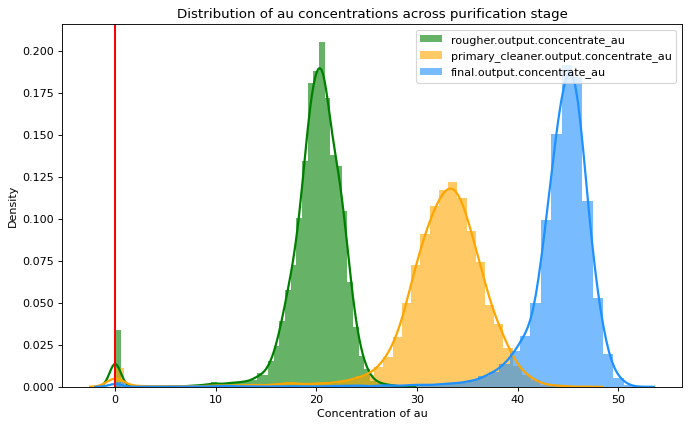

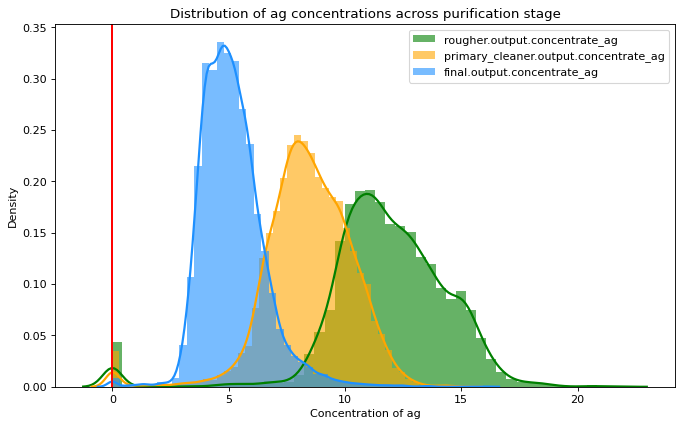

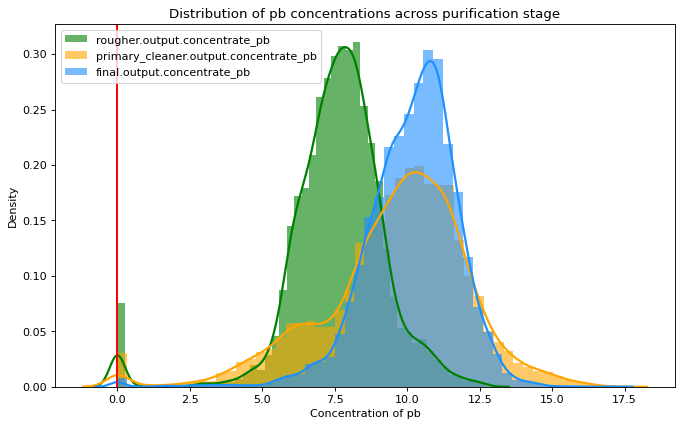

In [24]:
plot_distribution(gold_recovery_train)


#### Summary 
These plots show an increase in concentration across the purification process for gold, a decrease in concentration for silver and a near constant concentration for lead. This indicates that the process is working as expected. 

<div class="alert alert-success">
<b>Reviewer's comment</b>

Alright, so the process is working as we would expect

</div>

### Comparing the datasets
Now I will look for differences in distribution across the datasets. I will look at feed particle size and look at differences in the averages for the rougher and the cleaner across the data

In [25]:
def plot_particle_size_distribution(df):
    kwargs = dict(hist_kws={'alpha': 0.5}, kde_kws={'linewidth':2})
    plt.figure(figsize=(10,6), dpi=80)
    for features, colour, labels in zip(input_feed, xcolors, xlabel_):
        sns.distplot(features, color=colour, label=labels, **kwargs)
        plt.axvline(0, c="r")
    plt.title('Feed particle size distribution for '+ [x.split('__', 1)[1] for x in xlabel_][0])
    plt.xlabel('Distribution of feed particle size')
    plt.legend();

In [26]:
rougher_input_train = gold_recovery_train['rougher.input.feed_size'].mean()
rougher_input_test = gold_recovery_test['rougher.input.feed_size'].mean()

primary_cleaner_input_train, primary_cleaner_input_test = gold_recovery_train['primary_cleaner.input.feed_size'].mean(), gold_recovery_test['primary_cleaner.input.feed_size'].mean()

print('Average particle size for rougher input train set is {:.2f}'.format(rougher_input_train))
print('Average particle size for primary cleaner input train set is {:.2f}'.format(primary_cleaner_input_train))
print()
print('Average particle size for rougher input test set is {:.2f}'.format(rougher_input_test))
print('Average particle size for primary cleaner input test set is {:.2f}'.format(primary_cleaner_input_test))

Average particle size for rougher input train set is 57.22
Average particle size for primary cleaner input train set is 7.40

Average particle size for rougher input test set is 55.94
Average particle size for primary cleaner input test set is 7.26


Now I will plot the feed particle size destribution

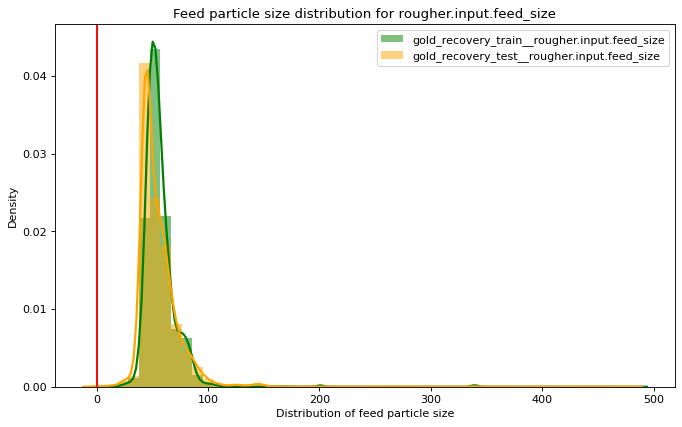

In [27]:
input_feed = [gold_recovery_train['rougher.input.feed_size'], gold_recovery_test['rougher.input.feed_size']]
xlabel_ = ['gold_recovery_train__rougher.input.feed_size', 'gold_recovery_test__rougher.input.feed_size']
xcolors = ['green', 'orange']

plot_particle_size_distribution(gold_recovery_train)

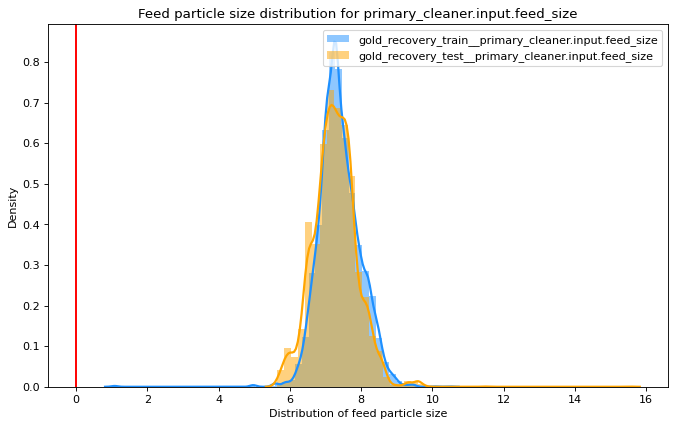

In [28]:
input_feed = [gold_recovery_train['primary_cleaner.input.feed_size'], gold_recovery_test['primary_cleaner.input.feed_size']]
xlabel_ = ['gold_recovery_train__primary_cleaner.input.feed_size', 'gold_recovery_test__primary_cleaner.input.feed_size']
xcolors = ['dodgerblue', 'orange']

plot_particle_size_distribution(gold_recovery_test)

#### Summary
These plots indicate that there is very little variation in the datasets between this feature. this means that I will be able to train the data on the training dataset and be able to test the model with the dataset and it will be a good indicator of the models quality. 

<div class="alert alert-success">
<b>Reviewer's comment</b>

Particle size distributions were compared successfully

</div>

### Anomolies 
Now I will look at the distribution of the total concentration of all substances at different stages. 

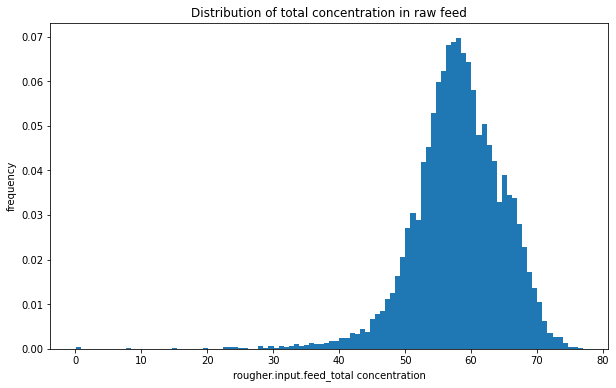

In [29]:
gold_recovery_full['rougher.input.feed.total_concentration'] = gold_recovery_full[['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_sol', 'rougher.input.feed_au']].sum(axis=1)

total_conc_stage_1 = gold_recovery_full['rougher.input.feed.total_concentration']
plt.figure(figsize=(10,6))
plt.hist(total_conc_stage_1, density=True, bins=100)

plt.xlabel('rougher.input.feed_total concentration')
plt.ylabel('frequency')
plt.title("Distribution of total concentration in raw feed");

The distribution of the rougher.input.feed.total_concentration is left-skewed. 

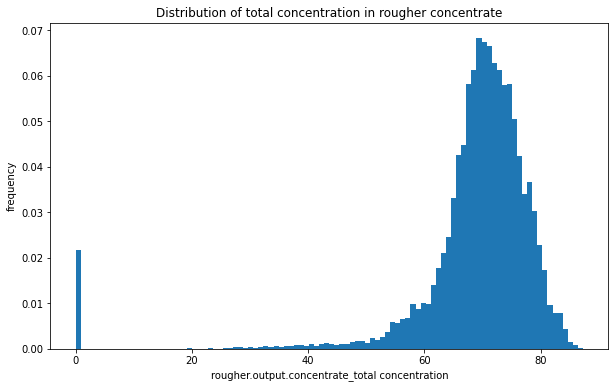

In [30]:
gold_recovery_full['rougher.output.concentrate.total_concentration'] = gold_recovery_full[['rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'rougher.output.concentrate_au']].sum(axis=1)

total_conc_stage_2 = gold_recovery_full['rougher.output.concentrate.total_concentration']
plt.figure(figsize=(10,6))
plt.hist(total_conc_stage_2, density=True, bins=100)

plt.xlabel('rougher.output.concentrate_total concentration')
plt.ylabel('frequency')
plt.title("Distribution of total concentration in rougher concentrate");

The distribution of the rougher.input.feed.total_concentration is left-skewed. At the zero mark, we noticed a large spike in concentration. This represents an anomaly or outlier in the data and should be removed.

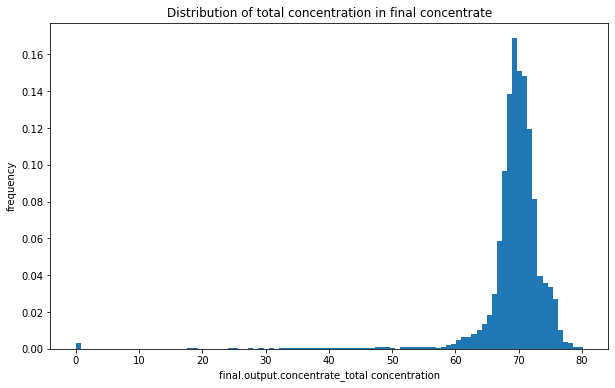

In [31]:
gold_recovery_full['final.output.concentrate.total_concentration'] = gold_recovery_full[['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.concentrate_au']].sum(axis=1)

total_conc_stage_3 = gold_recovery_full['final.output.concentrate.total_concentration'] 
plt.figure(figsize=(10,6))
plt.hist(total_conc_stage_3, density=True, bins=100)

plt.xlabel('final.output.concentrate_total concentration')
plt.ylabel('frequency')
plt.title("Distribution of total concentration in final concentrate");

The distribution of the rougher.input.feed.total_concentration is left-skewed. At the zero mark, we noticed a small spike in concentration. This represents an anomaly or outlier in the data and should be removed.

#### Summary

All three charts have a left-skew and the last chart showed a singular peak at zero. Possible reasons for the anomaly at zero could be data entry errors or they represent observations that occured under unusual conditions. Or, they are legitimate observations that accurately describe the variability in the study area. We never know but we must remove this anomaly in order to prevent a bias or variance in the analysis.

#### Removing the anomalies 
I will now resolve the anomalies in the data so that it will be ready for training and testing our models.

First I will filter the full dataset without the anomaly

In [32]:
gold_recovery_full_data = gold_recovery_full[(gold_recovery_full['rougher.input.feed.total_concentration'] > 0.8) & 
                                        (gold_recovery_full['rougher.output.concentrate.total_concentration'] > 0.95) & 
                                        (gold_recovery_full['final.output.concentrate.total_concentration'] > 0.8)]
print('The shape of the new dataset is: ', format(gold_recovery_full_data.shape))
print()
gold_recovery_full_data.describe()

The shape of the new dataset is:  (15748, 90)



,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.input.feed.total_concentration,rougher.output.concentrate.total_concentration,final.output.concentrate.total_concentration
count,15748.000000,15748.000000,15748.000000,15748.000000,15748.000000,15748.000000,15748.000000,15748.000000,15748.000000,15748.000000,...,15748.000000,15748.000000,15748.000000,15748.000000,15748.000000,15748.000000,15748.000000,15748.000000,15748.000000,15748.000000
mean,5.214304,10.026196,9.913246,44.400564,67.752523,9.798429,2.764170,10.945094,3.118651,152.759136,...,-459.278568,15.352882,-487.765038,11.899371,-486.228794,19.337494,-506.277787,58.117670,70.137178,69.554310
std,1.310202,1.486243,2.726059,3.545001,7.804956,2.316004,0.923925,2.598995,0.841430,41.007674,...,68.123256,5.388184,35.931051,5.276311,39.346925,5.402735,39.407940,6.695667,7.445869,4.892338
min,0.594630,1.388714,0.360562,5.901388,2.030917,0.000000,0.000000,0.000000,0.000000,1.873963,...,-799.868171,-0.372054,-797.142475,2.781642,-800.006180,0.127304,-809.741464,8.217984,2.016647,11.022639
25%,4.295335,9.110201,8.183922,43.426501,63.957616,8.035304,2.119044,9.373385,2.554949,122.607905,...,-500.212520,10.965728,-500.469663,8.045268,-500.138455,15.001278,-500.809756,54.330388,66.935623,68.378342
50%,5.103525,10.094175,9.641001,44.972065,68.362500,9.911354,2.783907,10.858379,3.053608,150.047538,...,-499.346287,14.959353,-499.780937,11.004297,-499.931077,19.985565,-500.067964,58.257695,70.811068,69.957987
75%,5.902746,11.040210,11.370904,46.238841,72.661421,11.276489,3.352763,12.230140,3.601351,181.637569,...,-400.077723,18.008575,-498.228842,13.999019,-499.283556,23.041616,-499.495877,62.600756,74.833940,71.687447
max,16.001945,17.031899,19.615720,51.571885,100.000000,19.552149,5.804178,22.272019,8.245022,265.983123,...,-110.550392,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459,76.978947,87.273435,80.210644


I will find the index of the train set that can be found in the new full dataset and use this new index to filter the gold_recovery_full_data for the new train dataset free of the anomaly.  I will do a similar operation for the test set too.

In [33]:
gold_recovery_test.set_index('date', inplace=True)
gold_recovery_train.set_index('date', inplace=True)
gold_recovery_full_data.set_index('date', inplace=True)

In [34]:
gold_recovery_train_data_index = gold_recovery_full_data.index.intersection(gold_recovery_train.index)
gold_recovery_train_data_index.shape

(10779,)

In [35]:
gold_recovery_train_data = gold_recovery_full_data.loc[gold_recovery_train_data_index]
gold_recovery_train_data.reset_index(inplace=True)
gold_recovery_train_data.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.input.feed.total_concentration,rougher.output.concentrate.total_concentration,final.output.concentrate.total_concentration
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,51.680034,66.424950,63.644396
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,50.659114,67.012710,63.957723
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,50.609929,66.103793,64.311180
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,51.061546,65.752751,63.573449
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,47.859163,65.908382,64.004667


In [36]:
gold_recovery_test_data_index = gold_recovery_full_data.index.intersection(gold_recovery_test.index)
gold_recovery_test_data_index.shape

(4969,)

In [37]:
gold_recovery_test_data = gold_recovery_full_data.loc[gold_recovery_test_data_index]
gold_recovery_test_data.reset_index(inplace=True)
gold_recovery_test_data.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.input.feed.total_concentration,rougher.output.concentrate.total_concentration,final.output.concentrate.total_concentration
0,2016-09-01 00:59:59,7.578381,10.466295,11.990938,40.743891,70.273583,12.688885,3.844413,11.075686,4.537988,...,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,72.871822,79.939838,70.779504
1,2016-09-01 01:59:59,7.813838,10.581152,12.216172,39.604292,68.910432,12.829171,3.918901,11.132824,4.675117,...,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,71.669225,81.118880,70.215454
2,2016-09-01 02:59:59,7.623392,10.424024,12.313710,40.724190,68.143213,12.977846,4.026561,10.990134,4.828907,...,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,73.202598,79.267044,71.085315
3,2016-09-01 03:59:59,8.552457,10.503229,13.074570,39.290997,67.776393,12.451947,3.780702,11.155935,4.969620,...,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987,70.757057,81.335254,71.421253
4,2016-09-01 04:59:59,8.078781,10.222788,12.475427,40.254524,61.467078,11.827846,3.632272,11.403663,5.256806,...,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333,68.654396,80.902631,71.031520


<div class="alert alert-success">
<b>Reviewer's comment</b>

Rows with abnormal total concentration were detected and removed

</div>

### Conclusion 
Through the initial analysis of the distribution of concentration of metals across purification stage, we observed that the concentration of gold (au) increased from the rougher.output to the final.output. This indicated that the process is performing as designed. 
Then I compared the feed particle size distribution for the training and test dataset, and observed similar particle size distributions with little or no variation in the distribution.
When I checked for anomalies in total concentrations of all substances at different stages it was observed anomalies were present in the data with an abnormal peak in total concentration at 0. 
We used a threshold between 0.8 and 0.95 to remove the anomaly. We used the index of train and test set to generate new train and test data without anomaly from the full dataset. Now the data is prepared for model building.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Nice summary!

</div>

## Build the Model 
I am tasked with training a model which will predict two values:

- rougher concentrate recovery rougher.output.recovery
- final concentrate recovery final.output.recovery

To do that, I will build and train different models, and evaluate them using cross-validation. I will use the sMAPE and Final sMAPE formulas as evaluation metrics.

In [38]:
def smape(y_true, y_pred):
    smape = (np.abs(y_true - y_pred)/((np.abs(y_true) + np.abs(y_pred))/2)).mean()
    return smape

def smape_final(y_true, y_pred):
    smape_out_rougher = smape(y_true[:,0], y_pred[:,0])
    smape_out_final = smape(y_true[:,1], y_pred[:,1])
    return ((0.25 * smape_out_rougher) + (0.75 * smape_out_final))

smape_score = make_scorer(smape_final, greater_is_better=False)

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

SMAPE calculation functions are correct, but there is a subtle problem with how the scorer object was initialized: in scikit-learn there is a convention that the higher the 'score' returned by the scorer object the better (so that GridSearhCV and similar tools would always just maximize the score). This works without any changes for metrics like accuracy, F1 score, precision, recall, etc., but for error functions like MAE, MSE, SMAPE it leads to maximizing the error. We'd like to minimize the error instead, how can we do that? Well, one way is to just maximize the flipped function, i.e. multiplied by -1: that's exactly what setting `greater_is_better=False` parameter of `make_scorer` does. To see why it makes sense, think of going from minimizing y = x^2 to maximizing y = -x^2, the minimum point of the original function is the same as the maximum point of the function multiplied by -1.
    
So, if you use the scorer for an error function without `greater_is_better=False`, tools like `GridSearchCV` will maximize the error leading to selecting the worst model.

</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Fixed!

</div>

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

Going back to task 1.3, the point was that `output` and `calculation` columns are not present in the test set because these columns are not available before the process is finished, and thus we can't use them as features in our models

</div>

<div class="alert alert-danger">
<s><b>Reviewer's comment V2</b>

Still not quite correct: `gold_recovery_test_data` has the same set of columns as `gold_recovery_full`, but we need to use the columns from the *original* test set as features (or just `input` and `state` features, in other words)

</div>

<div class="alert alert-danger">
<s><b>Reviewer's comment V3</b>

Unfortunately still not correct. If you look at the set of columns in `gold_recovery_test_data`, it contains all columns from the full dataset (the same set of columns as `gold_recovery_train_data` and `gold_recovery_full`). You need to save the set of columns from the original test set (`gold_recovery_test`).

</div>

<div class="alert alert-warning">
<b>Reviewer's comment V4</b>

Ok, fixed, but now the filtering for abnormal values from above is lost. 

</div>

In [39]:
gold_recovery_train=gold_recovery_train.dropna()

In [40]:
gold_recovery_test=gold_recovery_test.dropna()

In [41]:
#features_train = gold_recovery_train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
#features_test = gold_recovery_test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
#target_train = gold_recovery_train[['rougher.output.recovery', 'final.output.recovery']]
#target_test = gold_recovery_test[['rougher.output.recovery', 'final.output.recovery']]

In [42]:
#target_train=target_train.values
#target_test=target_test.values

In [43]:
target = ['rougher.output.recovery', 'final.output.recovery']
features = list(set(gold_recovery_train.columns).intersection(set(gold_recovery_test.columns)).difference(set(target)))

In [44]:
features_train, features_test = gold_recovery_train[features].values, gold_recovery_test[features].values
target_train, target_test = gold_recovery_train[target].values, gold_recovery_test[target].values


In [45]:
features_train.shape

(11017, 52)

In [46]:
features_test.shape

(4554, 52)

In [47]:
target_test.shape

(4554, 2)

In [48]:
target_train.shape

(11017, 2)

<div class="alert alert-warning">
<b>Reviewer's comment</b>

Applying scaling to the whole dataset used for cross-validation is inappropriate: to avoid data leakage (and overly optimistic cross-validation scores as a result) scaling should be applied in each fold separately. One easy way to achieve this is using [pipelines](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)

</div>

### Baseline model 
using a dummy regressor

In [49]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(features_train, target_train)
dummy_regr_test_predictions = dummy_regr.predict(features_test)

Evaluate

In [50]:
smape_final(target_test, dummy_regr_test_predictions)

0.11420314934872655

Our baseline sMAPE is 11.42. Lets see if we can improve.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Good, there is a simple baseline

</div>

### Linear Regression

In [51]:
start_time = timeit.default_timer()
lr_regr = LinearRegression().fit(features_train, target_train) 

cv_score_lr = cross_val_score(lr_regr, features_train, target_train, cv=5, scoring=smape_score)
print('Mean smape:  {:.2%}'.format(cv_score_lr.mean()))
print('sMAPE range of values are: ', cv_score_lr)
print()
print('Execution time: ' + str((timeit.default_timer() - start_time)) + ' mins')

Mean smape:  -10.29%
sMAPE range of values are:  [-0.11327987 -0.08886104 -0.09270128 -0.10787246 -0.11183018]

Execution time: 0.5574010070413351 mins


### Random Forest Regression Model
I will check without tuning hyperparameters first

In [52]:
start_time = timeit.default_timer()
rf_regr = RandomForestRegressor().fit(features_train, target_train) # train the model 

cv_score_rf = cross_val_score(rf_regr, features_train, target_train, cv=5, scoring=smape_score)
print('Mean smape:  {:.2%}'.format(cv_score_rf.mean()))
print('sMAPE range of values are: ', cv_score_rf)
print()
print("Execution time: " + str((timeit.default_timer() - start_time)/60) + ' mins')

Mean smape:  -11.08%
sMAPE range of values are:  [-0.09413354 -0.11737779 -0.09124396 -0.12524529 -0.12621457]

Execution time: 6.943736650561914 mins


#### With hyperparameter tuning
Using grid search to find the hyperparameters for the random forest algorithm

In [53]:
for i in [10, 25, 50]:
    rf = RandomForestRegressor(n_estimators = i, random_state = 12345)
    rf.fit(features_train, target_train)
    cross_val_scores_rf = cross_val_score(rf, features_train, target_train, cv=5, scoring=smape_score)
    print('n_estimators: ' + str(i) + ', Mean smape: {:.4%}'.format(cross_val_scores_rf.mean()))

n_estimators: 10, Mean smape: -13.5919%
n_estimators: 25, Mean smape: -11.8576%
n_estimators: 50, Mean smape: -11.4970%


In [54]:
start_time = timeit.default_timer()

grid = {
    "n_estimators" : [10, 25, 50]
} 
regressor = RandomForestRegressor(random_state = 12345)

grid_search_rf = GridSearchCV(estimator = regressor, param_grid = grid, scoring=smape_score)

grid_search_rf.fit(features_train, target_train)

print('The best hyperparameters are: {}'.format(grid_search_rf.best_params_))
print()
print("Execution time: " + str((timeit.default_timer() - start_time)/60) + ' mins')

The best hyperparameters are: {'n_estimators': 50}

Execution time: 5.389975279119486 mins


In [55]:
model_rf = RandomForestRegressor(**grid_search_rf.best_params_)
model_rf.fit(features_train, target_train) 
cv_score_rf= cross_val_score(model_rf, features_train, target_train, cv=5, scoring=smape_score)
print('Mean smape:  {:.2%}'.format(cv_score_rf.mean()))
print('sMAPE range of values are: ', cv_score_rf)
print()


Mean smape:  -11.53%
sMAPE range of values are:  [-0.09829462 -0.12758366 -0.09432937 -0.12783726 -0.12825269]



Though we can see a decrease in our mean sMAPE score. The execution time has increased as well

### Decision Tree Regression model

In [56]:
start_time = timeit.default_timer()
dt_regr = DecisionTreeRegressor().fit(features_train, target_train)  

cv_score_dt = cross_val_score(dt_regr, features_train, target_train, cv=5, scoring=smape_score)
print('Mean smape:  {:.4%}'.format(cv_score_dt.mean()))
print('sMAPE range of values are: ', cv_score_dt)
print()
print("Execution time: " + str((timeit.default_timer() - start_time)/60) + ' mins')

Mean smape:  -17.3835%
sMAPE range of values are:  [-0.13588113 -0.21783936 -0.12846931 -0.20490243 -0.18208049]

Execution time: 0.12293302174657583 mins


#### Decision Tree with hyperparameter tuning

In [62]:
for i in [2, 4, 8]:
    dt = DecisionTreeRegressor(max_depth = i, random_state = 12345)
    dt.fit(features_train, target_train)
    cross_val_scores_dt = cross_val_score(dt, features_train, target_train, cv=5, scoring=smape_score)
    print('Max depth: ' + str(i) + ', Mean smape: {:.4%}'.format(cross_val_scores_dt.mean()))

Max depth: 2, Mean smape: -9.2568%
Max depth: 4, Mean smape: -9.8451%
Max depth: 8, Mean smape: -11.0130%


In [63]:
start_time = timeit.default_timer()

params_ = {
    "max_depth" : [2, 4, 8],
    "min_samples_split" : [2, 4, 8]
    }

dt_regressor = DecisionTreeRegressor()

grid_search_dt = GridSearchCV(estimator = dt_regressor, param_grid = params_, scoring=smape_score)

grid_search_dt.fit(features_train, target_train)

print('The best hyperparameters are: {}'.format(grid_search_dt.best_params_))
print()
print("Execution time: " + str((timeit.default_timer() - start_time)/60) + ' mins')

The best hyperparameters are: {'max_depth': 2, 'min_samples_split': 8}

Execution time: 0.24930684745001297 mins


In [64]:
dt_model = DecisionTreeRegressor(**grid_search_dt.best_params_)
dt_model.fit(features_train, target_train) 
cv_score_dt= cross_val_score(dt_model, features_train, target_train, cv=5, scoring=smape_score)
print('Mean smape:  {:.2%}'.format(cv_score_dt.mean()))
print('sMAPE range of values are: ', cv_score_dt)
print()

Mean smape:  -9.26%
sMAPE range of values are:  [-0.08691361 -0.08341002 -0.06984121 -0.11754129 -0.10513367]



### Summary
With the decision tree regressor, when we tuned various hyperparameters, the optimized sMAPE score was 9.26

<div class="alert alert-warning">
<b>Reviewer's comment V2</b>

The actual SMAPE value is positive (the formula doesn't allow for negative results), the value is negative only due to a technicality described above (setting `greater_is_better=False` negates the score in line with the convention that in scikit-learn the score is always maximized)

</div>

## Final Test

In [60]:
def test_run(X_train, y_train, X_test, y_test):
    
    model_dtr = DecisionTreeRegressor(**grid_search_dt.best_params_)
    model_dtr.fit(features_train, target_train)  
    dtr_test_predictions = model_dtr.predict(X_test)
    
    print('The final sMAPE is: {:.2%}'.format(smape_final(target_test, dtr_test_predictions)))

In [61]:
test_run(features_train, target_train, features_test, target_test)

The final sMAPE is: 12.17%


<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

Great, you tried a few different models and did some hyperparameter tuning and used our target metric to compare the models. It seems that you slightly misunderstood how the test set should be used though: its sole purpose in life is to be used to evaluate the single final model. To compare different models just use their cross-validation results. If we use the test set to make any decisions about the models, it won't be possible to get an unbiased estimate of how well the final model generalizes to new data.

</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Great!

</div>

## Final Conclusion

After the data was imported and the general information was inspected for the dataset, a significant share of NA where observed. I then proceeded to calculate the recovery for the rougher.output.recovery feature using the training set. I computed the mean absolute error between the calculated value and feature values to be 0.0. This signifies that the recovery value was calculated correctly since there was no error. I chose to resolve the NA's by dropping them and changed the datatype in the date feature to datetime.

On analyzing the distribution of concentration of metals across purification stage, it was  observed that the concentration of gold (au) increased from the rougher.output to the final.output, and noted that our process is performing as designed. The data was then checked for anomalies in the data and compared the feed particle size distribution for the training and test dataset. An abnormal peak in total concentration was found at 0. The anomaly was removed using a threshold between 0.8 and 0.95. The index of train and test set was used to generate new train and test data without anomaly from the full dataset.

In building the model, I wrote a function to calculate the final sMAPE value, and trained different models, evaluated them using cross-validation, with and without hyperparameter tuning. The final model was tested using the test sample. It was observed that the best performing model is the Random forest regressor followed by the linear regression model. In summary, the model with the best performance is the Random forest regressor based on the final sMAPE metric. This model was able to predict the amount of gold recovered and optimize gold production with a symetrical Mean Absolute Percentage Error of only 12.17%.

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

Please check the conclusions after fixing the problems above

</div>

<div class="alert alert-success">
<b>Reviewer's comment V4</b>

It's importnant to note that we weren't able to improve on the baseline, which means our model is not very useful. There can be several reasons for this: for example, maybe data quality is poor or maybe there is some hidden variable which we didn't account for

</div>

Thank you for your time reviewing my project! :)

<div class="alert alert-success">
<b>Reviewer's comment</b>

You're welcome :)

</div>